## Tailles

visualisation des histogrammes des tailles des contributions en caractères

Imports nécessaires :

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Options d'affichages pandas :

In [2]:
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_colwidth', 500)

## Import contributions

In [3]:
#Contributions :
data_ecolo=pd.read_csv('Donnees_clean/contributions/data_ecolo.csv')
data_serv_pub =pd.read_csv('Donnees_clean/contributions/data_serv_pub.csv')
data_fisc= pd.read_csv('Donnees_clean/contributions/data_fisc.csv')
data_dem=pd.read_csv('Donnees_clean/contributions/data_dem.csv')

C:\Users\adrie\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\adrie\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Titres : 

Concatenation des titres de tous les thèmes de contribution :

In [4]:
All_contrib_title=pd.concat([data_ecolo.title, data_serv_pub.title, data_fisc.title, data_dem.title], ignore_index=True)

In [5]:
print(data_ecolo.shape[0]+data_serv_pub.shape[0]+data_fisc.shape[0]+data_dem.shape[0])

282562

In [6]:
print(All_contrib_title.shape)

(282562,)

In [7]:
All_contrib_title=All_contrib_title.astype('str')
lengths=[]
for i in All_contrib_title:
    lengths.append(len(i))

C:\Users\adrie\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


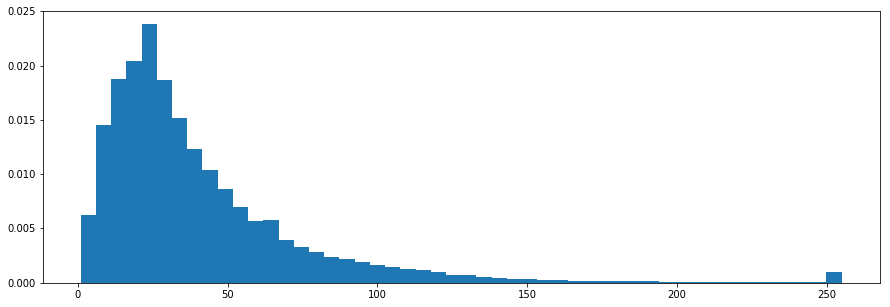

Taille moyenne des titres :  40.88023867328232


In [8]:
fig=plt.figure(figsize=(15,5))
plt.hist(lengths,bins=50, normed=True )
plt.show()
print('Taille moyenne des titres : ', np.mean(lengths))

## Réponses : 

In [9]:
data_ecolo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35982 entries, 0 to 35981
Data columns (total 27 columns):
Unnamed: 0                                                                                                                                                                                                                                             35982 non-null int64
reference                                                                                                                                                                                                                                              35982 non-null object
title                                                                                                                                                                                                                                                  35982 non-null object
createdAt                                                                            

In [10]:
data_ecolo_questions=data_ecolo.drop(['Unnamed: 0', 'reference', 'title', 'createdAt', 'publishedAt', 'updatedAt','trashed', 'trashedStatus', 'authorId', 'authorType', 'authorZipCode'],axis=1)

### Tests sur le bon fonctionnement du code utilisé :

In [11]:
k=0
for i in data_ecolo_questions:
    for n in data_ecolo_questions[i]:
        k+=1
print(k)

575712


In [12]:
data_ecolo_questions.shape[0]*data_ecolo_questions.shape[1]

575712

In [13]:
lengths_ecolo=[]
for i in data_ecolo_questions:
    for rep in data_ecolo_questions[i].dropna().astype('str'):
        lengths_ecolo.append(len(rep))

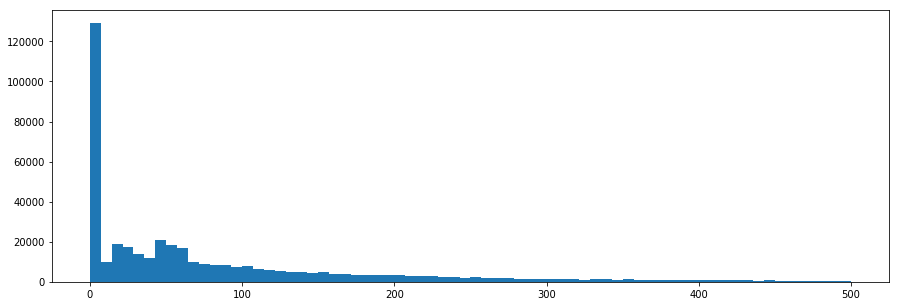

Taille moyenne des réponses aux questions ecolo :  123.38813586349865
part des contributions plus grandes que la taille d'un tweet (140) : 0.24048112627286602
part des contributions plus grandes que la taille d'un tweet (280) : 0.10455612000820101
part des contributions de la taille de 3 caractères : 0.28270269038886486


In [14]:
fig2=plt.figure(figsize=(15,5))
plt.hist(lengths_ecolo,bins=70, range=(0, 500))
plt.show()
print('Taille moyenne des réponses aux questions ecolo : ', np.mean(lengths_ecolo))

k=280
count_ecolo_280 = len([i for i in lengths_ecolo if i > k])/len(lengths_ecolo)
k=140
count_ecolo_140 = len([i for i in lengths_ecolo if i > k])/len(lengths_ecolo)

k=3
count_ecolo_3 = len([i for i in lengths_ecolo if i == k])/len(lengths_ecolo)
print("part des contributions plus grandes que la taille d'un tweet (140) :", count_ecolo_140)
print("part des contributions plus grandes que la taille d'un tweet (280) :", count_ecolo_280)
print("part des contributions de la taille de 3 caractères :", count_ecolo_3)

### Tests sur le bon fonctionnement des codes utilisés : 

In [15]:
k=0
for i in data_ecolo_questions:
    for n in data_ecolo_questions[i]:
        k+=1
print(k)

k=0
lengths_ecolo=[]
for i in data_ecolo_questions:
    for rep in data_ecolo_questions[i].dropna().astype('str'):
        k+=1
print(k)

data_ecolo_questions.shape[0]*data_ecolo_questions.shape[1]

575712
438970


575712

In [16]:
data_ecolo_questions.shape[0]*data_ecolo_questions.shape[1]-data_ecolo_questions.isna().sum().sum()

438970

## Utilisation propre d'une fonction : 

Fonction pour supprimer toutes les colonnes qui ne sont pas nécéssaires :

In [35]:
def questions_columns(raw_contrib):
    return raw_contrib.drop(['Unnamed: 0', 'reference', 'title', 'createdAt', 'publishedAt', 'updatedAt','trashed', 'trashedStatus', 'authorId', 'authorType', 'authorZipCode'],axis=1)

In [43]:
def stat_lengths(raw_contrib):
    lengths=[]
    for i in raw_contrib:
        for rep in raw_contrib[i].dropna().astype('str'):
            lengths.append(len(rep))
    fig2=plt.figure(figsize=(15,5))
    plt.title('taille de chaque réponse aux questions : ')
    plt.hist(lengths,bins=70, range=(0, 500))
    plt.show()
    print('Taille moyenne des réponses aux questions ecolo : ', np.mean(lengths))

    k=280
    count_280 = len([i for i in lengths if i > k])/len(lengths)
    k=140
    count_140 = len([i for i in lengths if i > k])/len(lengths)
    k=3
    count_3 = len([i for i in lengths if i == k])/len(lengths)
    print("part des contributions plus grandes que la taille d'un tweet (140) :", count_140)
    print("part des contributions plus grandes que la taille d'un tweet (280) :", count_280)
    print("part des contributions de la taille de 3 caractères :", count_3)

### Ecologie :

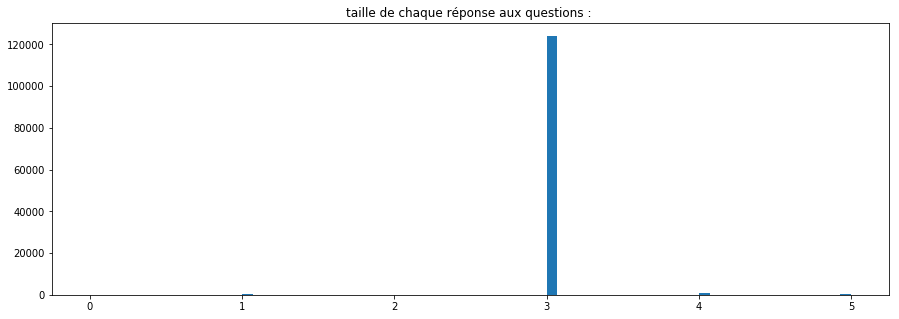

Taille moyenne des réponses aux questions ecolo :  123.38813586349865
part des contributions plus grandes que la taille d'un tweet (140) : 0.24048112627286602
part des contributions plus grandes que la taille d'un tweet (280) : 0.10455612000820101
part des contributions de la taille de 3 caractères : 0.28270269038886486


In [39]:
stat_lengths(questions_columns(data_ecolo))

### Services publiques : 

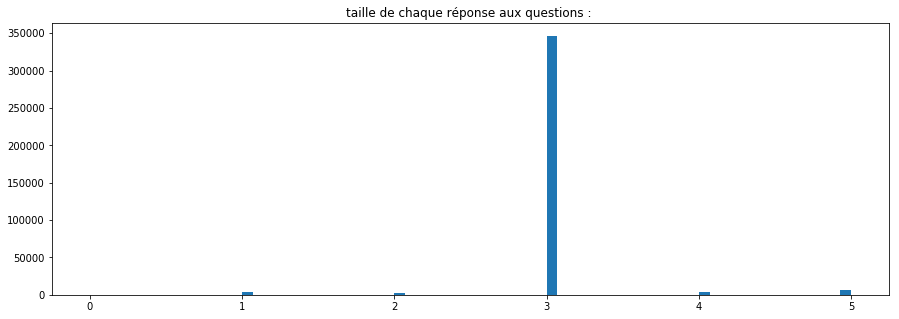

Taille moyenne des réponses aux questions ecolo :  117.08651667485837
part des contributions plus grandes que la taille d'un tweet (140) : 0.20631730991062683
part des contributions plus grandes que la taille d'un tweet (280) : 0.09641247858732638
part des contributions de la taille de 3 caractères : 0.38609795051317974


In [40]:
stat_lengths(questions_columns(data_serv_pub))

### Fiscalité :

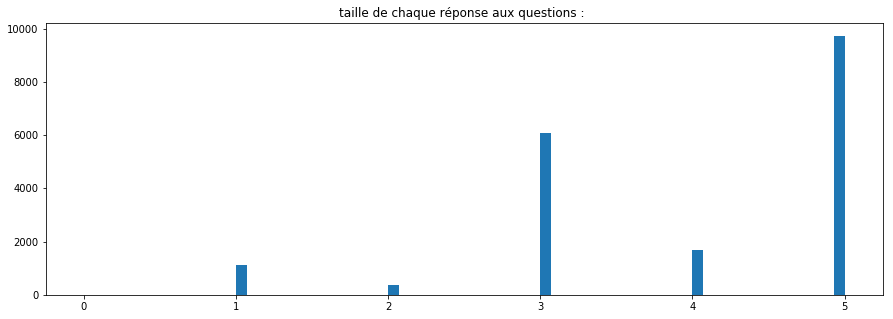

Taille moyenne des réponses aux questions ecolo :  191.50934827522244
part des contributions plus grandes que la taille d'un tweet (140) : 0.3426579420362162
part des contributions plus grandes que la taille d'un tweet (280) : 0.1615937162192415
part des contributions de la taille de 3 caractères : 0.007760059869898106


In [41]:
stat_lengths(questions_columns(data_fisc))

### Démocratie :

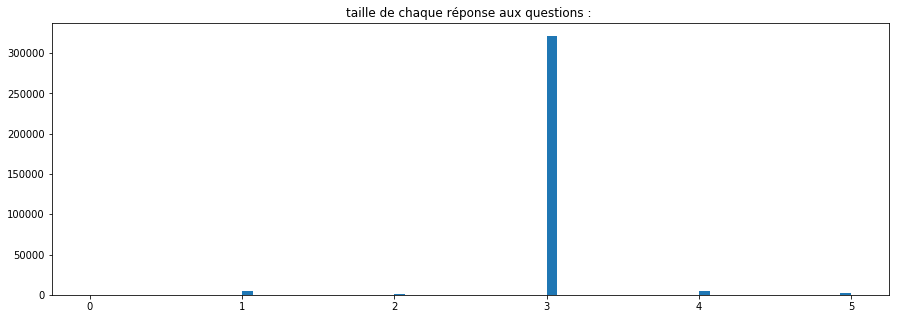

Taille moyenne des réponses aux questions ecolo :  120.85659562153185
part des contributions plus grandes que la taille d'un tweet (140) : 0.25507681112257236
part des contributions plus grandes que la taille d'un tweet (280) : 0.09649633686657692
part des contributions de la taille de 3 caractères : 0.19289300480212115


In [42]:
stat_lengths(questions_columns(data_dem))

## Nombre de réponses aux questions par contributeur : 

### Fonction : 

In [25]:
def stat_n_answers(raw_contrib):
    n_answers=raw_contrib.count(axis=1)
    fig2=plt.figure(figsize=(15,5))
    plt.hist(n_answers)
    plt.title('Nombre de réponses pour chaque contributeur :')
    plt.show()
    print('Nombre moyen de réponses :', np.mean(n_answers))

### Démocratie :

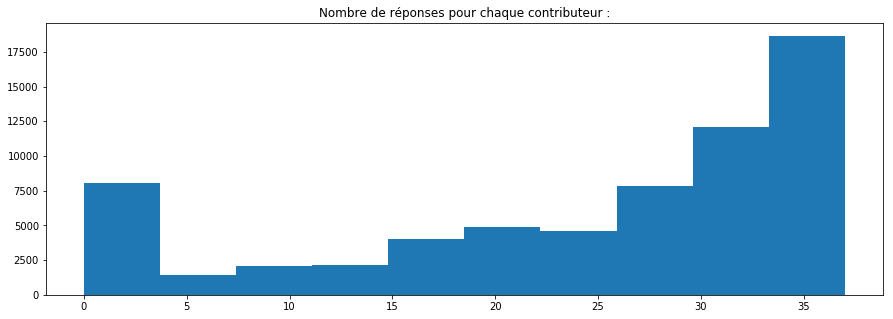

Nombre moyen de réponses : 24.32792968155966


In [32]:
stat_n_answers(questions_columns(data_dem))